<a href="https://colab.research.google.com/github/KritagyaKarki/test/blob/main/classification(2461984).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Exploratory Data Analysis & Data Understanding**

dataset name:adult census income dataset

The Adult Census Income dataset was created by Barry Becker in 1994 using data extracted from the 1994 U.S. Census database.

The dataset was accessed from Kaggle .

This dataset aligns with UN Sustainable Development Goal 8: Decent Work and Economic Growth, as it focuses on income classification and socio-economic factors such as education, occupation, working hours, and employment type. Understanding income inequality supports evidence-based economic policy and inclusive growth.




1.2.Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
import numpy as np





In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ai final assesment/adult.csv")  # adjust filename if needed
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape


(32561, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isin(["?"]).sum()


,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.replace("?", np.nan, inplace=True)
df.isnull().sum()


,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.dropna(inplace=True)


In [ ]:
df['income'].value_counts()


,count
income,
<=50K,22654
>50K,7508


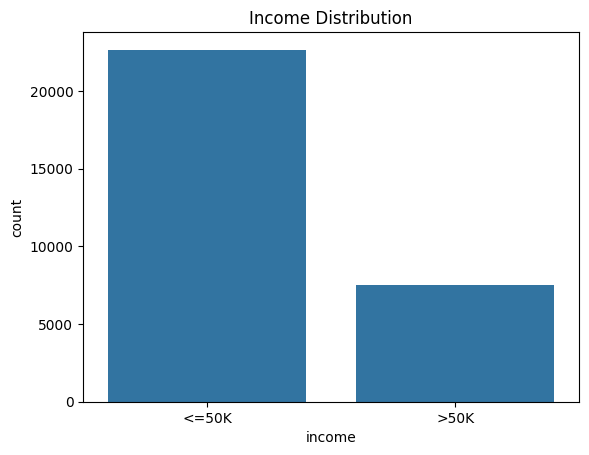

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()


In [ ]:
df['income'].value_counts(normalize=True)


,proportion
income,
<=50K,0.751078
>50K,0.248922


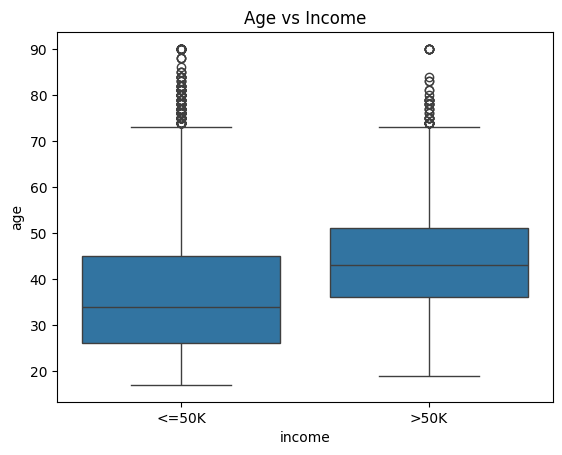

In [ ]:
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.show()


In [ ]:
pd.crosstab(df['education'], df['income'])


income,<=50K,>50K
education,,
10th,761,59
11th,989,59
12th,348,29
1st-4th,145,6
5th-6th,276,12
7th-8th,522,35
9th,430,25
Assoc-acdm,752,256
Assoc-voc,963,344


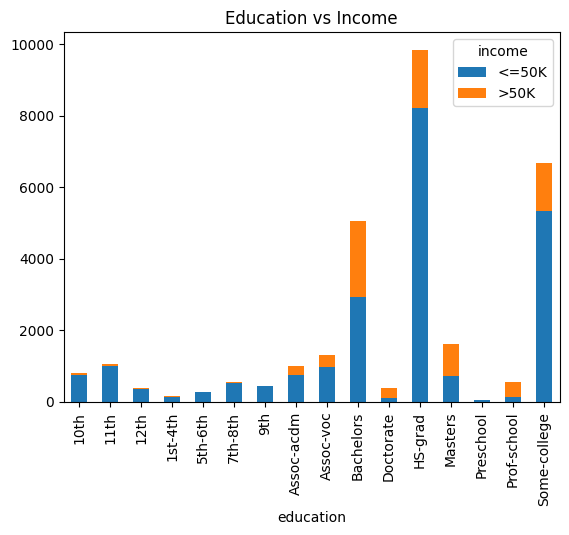

In [ ]:
pd.crosstab(df['education'], df['income']).plot(kind='bar', stacked=True)
plt.title("Education vs Income")
plt.show()


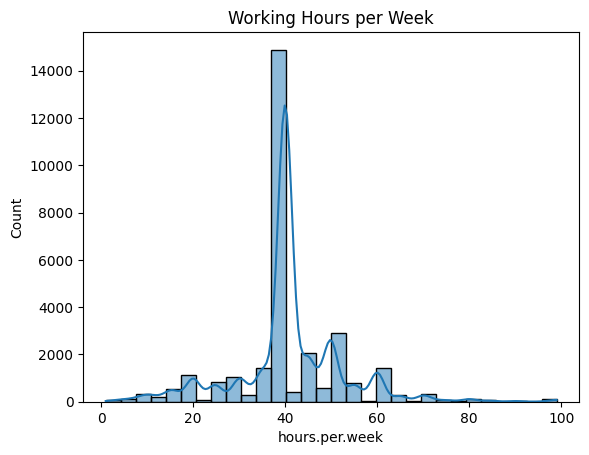

In [ ]:
sns.histplot(df['hours.per.week'], bins=30, kde=True)
plt.title("Working Hours per Week")
plt.show()

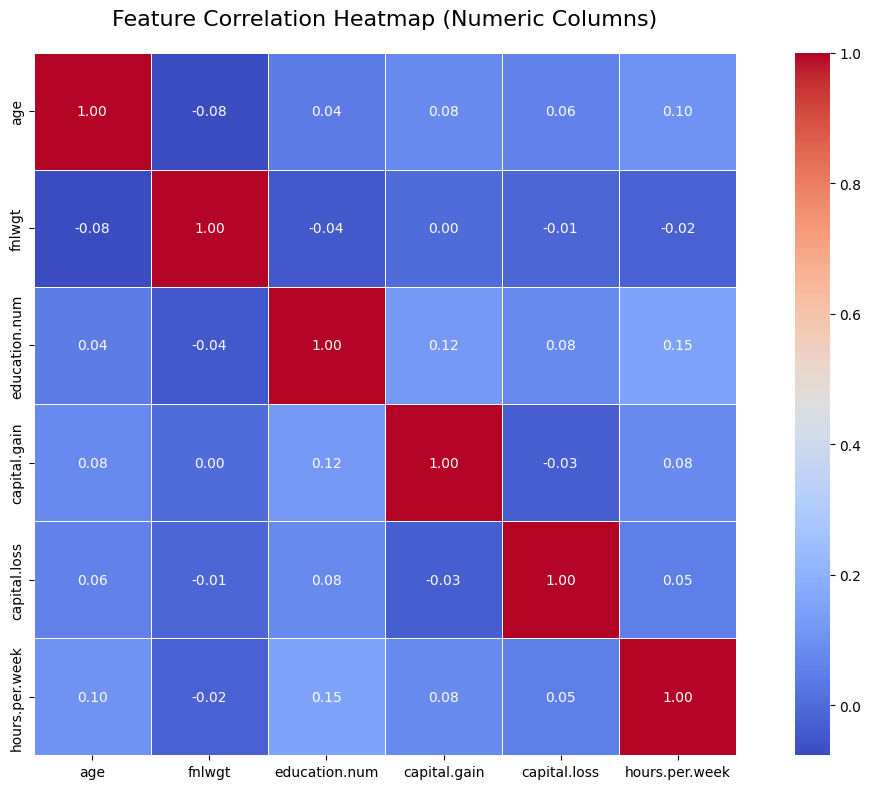

In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()
# Set up the figure
plt.figure(figsize=(12,8))
# Create heatmap with enhancements
sns.heatmap(
    corr,
    annot=True,            # show correlation values
    fmt=".2f",             # format values to 2 decimal places
    cmap="coolwarm",       # color scheme
    cbar=True,             # show color bar
    square=True,           # make cells square
    linewidths=0.5,        # add lines between cells
    annot_kws={"size":10}  # adjust annotation font size
)

# Add title with styling
plt.title("Feature Correlation Heatmap (Numeric Columns)", fontsize=16, pad=20)

# Improve layout
plt.tight_layout()
plt.show()

In [ ]:
# Target variable
y = df['income']

# Features
X = df.drop('income', axis=1)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # <=50K → 0, >50K → 1
X = pd.get_dummies(X, drop_first=True)




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # keeps class distribution
    random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. Build a Neural Network Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=500,
              random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8528095474888115
Precision: 0.7508169934640523
Recall: 0.6118508655126498
F1 Score: 0.6742479823917829
ROC-AUC: 0.9130810945517798


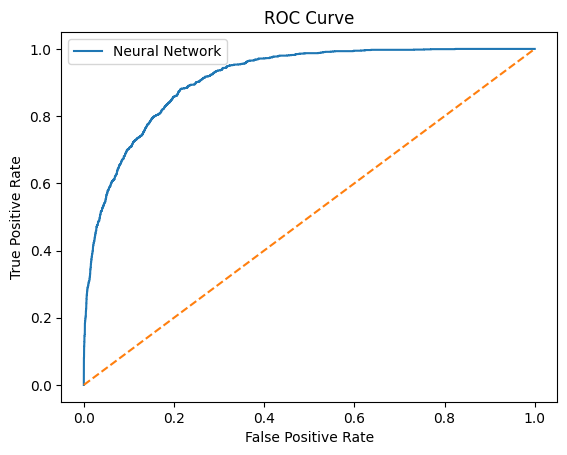

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Neural Network")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


3.Build a Primary Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


primary model-1 :logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # handle imbalance
    random_state=42
)
lr.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Metrics
Accuracy: 0.8184982595723521
Precision: 0.5946952070730572
Recall: 0.8508655126498003
F1 Score: 0.7000821692686935
ROC-AUC: 0.9131238536949631


primary model-2 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,           # limit depth to avoid overfitting
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))


Decision Tree Metrics
Accuracy: 0.8030830432620587
Precision: 0.5683202785030461
Recall: 0.8695073235685752
F1 Score: 0.6873684210526316
ROC-AUC: 0.894813536339835


In [ ]:


results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.818498,0.594695,0.850866,0.700082
1,Decision Tree,0.803083,0.568320,0.869507,0.687368


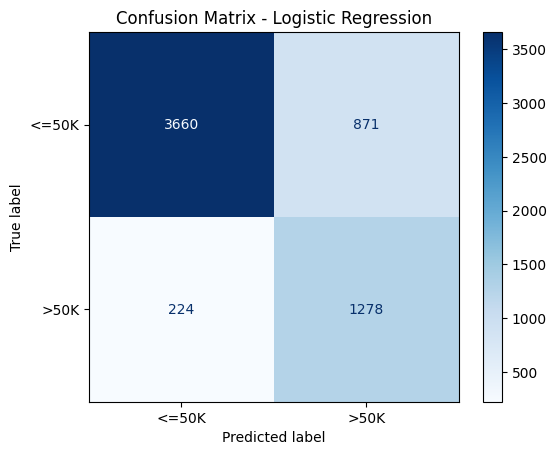

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['<=50K', '>50K'])
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

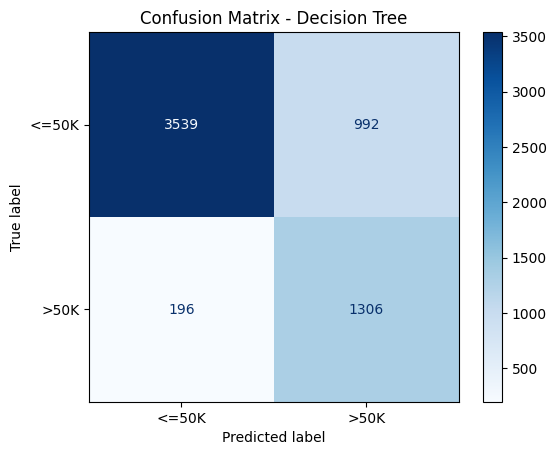

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['<=50K', '>50K'])
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

4. Hyper-parameter Optimization with Cross-Validation


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],        # l2 is standard
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1',   # Use F1 because dataset is imbalanced
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
print("Best hyperparameters for Logistic Regression:", grid_lr.best_params_)
print("Best cross-validation F1 score:", grid_lr.best_score_)


Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation F1 score: 0.6825460664363


In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
print("Best hyperparameters for Decision Tree:", grid_dt.best_params_)
print("Best cross-validation F1 score:", grid_dt.best_score_)


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation F1 score: 0.6839771087042039


5. Feature Selection

Feature Selection for Logistic Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Keep top 20 features
selector = SelectKBest(score_func=mutual_info_classif, k=20)
selector.fit(X_train_scaled, y_train)

# Get selected features
selected_features_filter = X_train.columns[selector.get_support()]
print("Selected features (Filter method):", selected_features_filter)

# Transform train/test sets
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)



Selected features (Filter method): Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Self-emp-inc', 'education_Bachelors',
       'education_Masters', 'education_Some-college',
       'marital.status_Married-civ-spouse', 'marital.status_Never-married',
       'occupation_Exec-managerial', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'sex_Male'],
      dtype='object')


We used a filter-based feature selection method with Mutual Information because it selects the most relevant features by measuring their relationship with the target variable, including non-linear patterns, while reducing the number of features and improving model efficiency.

Feature Selection for Decision Tree (Embedded)

In [ ]:
# Use best Decision Tree from GridSearchCV
best_dt = grid_dt.best_estimator_

# Feature importance
importances = best_dt.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
selected_features_dt = feature_importances.nlargest(20).index  # top 20 features
print("Selected features for Decision Tree:", selected_features_dt)


Selected features for Decision Tree: Index(['marital.status_Married-civ-spouse', 'education.num', 'capital.gain',
       'age', 'hours.per.week', 'capital.loss', 'fnlwgt', 'sex_Male',
       'race_Black', 'occupation_Other-service', 'occupation_Exec-managerial',
       'occupation_Prof-specialty', 'occupation_Farming-fishing',
       'workclass_Private', 'workclass_Local-gov', 'relationship_Wife',
       'education_HS-grad', 'relationship_Not-in-family',
       'occupation_Protective-serv', 'marital.status_Widowed'],
      dtype='object')


An embedded feature selection method was used for the Decision Tree model. Decision Trees naturally evaluate the importance of each feature during training based on how much it reduces impurity at each split.

In [ ]:
# Logistic Regression (Filter-selected features)
X_train_lr_sel = X_train_scaled[:, selector.get_support()]  # selector from SelectKBest
X_test_lr_sel = X_test_scaled[:, selector.get_support()]

# Decision Tree (Embedded-selected features)
X_train_dt_sel = X_train[selected_features_dt]  # selected_features_dt from Task 5
X_test_dt_sel = X_test[selected_features_dt]


6.Final Models and Comparative Analysis

In [ ]:
# Logistic Regression (Filter-selected features)
best_lr = grid_lr.best_estimator_  # best hyperparameters from Task 4

# Train
best_lr.fit(X_train_lr_sel, y_train)

# Predict
y_pred_lr = best_lr.predict(X_test_lr_sel)
y_prob_lr = best_lr.predict_proba(X_test_lr_sel)[:, 1]

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {acc_lr:.3f}")
print(f"Precision: {prec_lr:.3f}")
print(f"Recall: {recall_lr:.3f}")
print(f"F1-Score: {f1_lr:.3f}")
print(f"ROC-AUC: {roc_lr:.3f}")


Logistic Regression Metrics:
Accuracy: 0.809
Precision: 0.581
Recall: 0.831
F1-Score: 0.684
ROC-AUC: 0.907


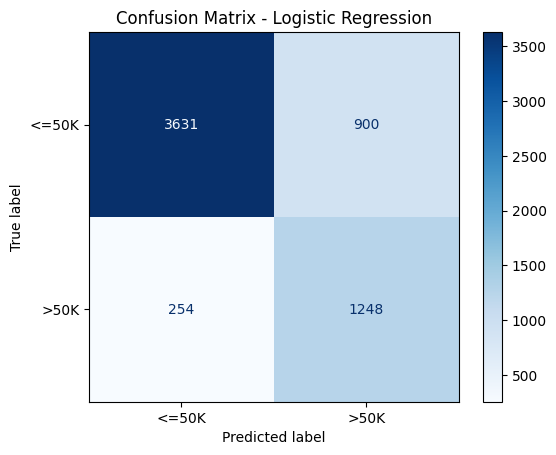

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['<=50K','>50K'])
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


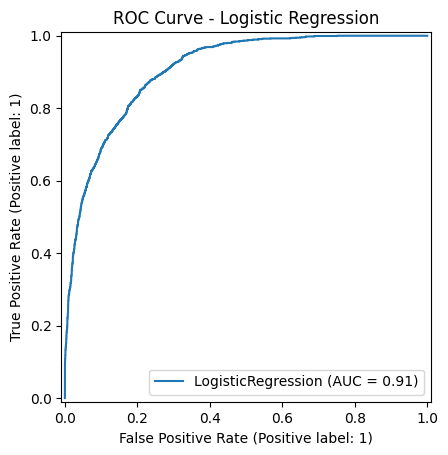

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_lr, X_test_lr_sel, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


In [ ]:
# Decision Tree (Embedded-selected features)
best_dt = grid_dt.best_estimator_  # best hyperparameters from Task 4

# Train
best_dt.fit(X_train_dt_sel, y_train)

# Predict
y_pred_dt = best_dt.predict(X_test_dt_sel)
y_prob_dt = best_dt.predict_proba(X_test_dt_sel)[:, 1]

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree Metrics:")
print(f"Accuracy: {acc_dt:.3f}")
print(f"Precision: {prec_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")
print(f"ROC-AUC: {roc_dt:.3f}")


Decision Tree Metrics:
Accuracy: 0.823
Precision: 0.602
Recall: 0.851
F1-Score: 0.705
ROC-AUC: 0.903


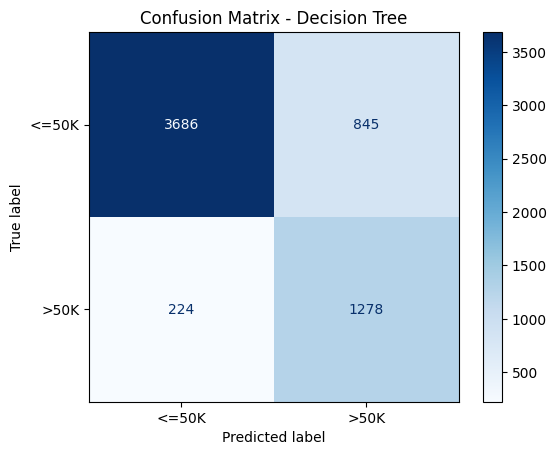

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['<=50K','>50K'])
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


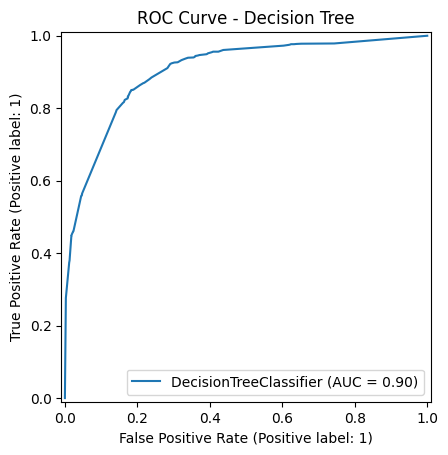

In [ ]:
RocCurveDisplay.from_estimator(best_dt, X_test_dt_sel, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()


In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features Used': ['Filter-selected (20)', 'Embedded-selected (20)'],
    'CV Score (F1)': [grid_lr.best_score_, grid_dt.best_score_],
    'Test Accuracy': [acc_lr, acc_dt],
    'Test Precision': [prec_lr, prec_dt],
    'Test Recall': [recall_lr, recall_dt],
    'Test F1-Score': [f1_lr, f1_dt],
    'Test ROC-AUC': [roc_lr, roc_dt]
})

comparison


,Model,Features Used,CV Score (F1),Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test ROC-AUC
0,Logistic Regression,Filter-selected (20),0.682546,0.808719,0.581006,0.830892,0.683836,0.906513
1,Decision Tree,Embedded-selected (20),0.683977,0.822808,0.601978,0.850866,0.705103,0.903010
